<a href="https://colab.research.google.com/github/anuradhaboche/yelp-dataset-analysis/blob/master/yelp_ml_gensim_lda_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Libraries**

In [0]:
import pandas as pd
import warnings
import numpy as np
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import time
!pip install -q pyLDAvis
warnings.filterwarnings(action = 'ignore') 

     |████████████████████████████████| 1.6MB 2.6MB/s 
     |████████████████████████████████| 552kB 39.8MB/s 


In [0]:
las_vegas_data= pd.read_pickle('/content/drive/My Drive/las_vegas_data_tokenized_final.pkl')

In [0]:
start= time.time()
tokenized_text=las_vegas_data['imp_tags'].tolist()
bigram_model=Phrases(tokenized_text)
trigram_model=Phrases(bigram_model[tokenized_text], min_count=1)
tokenized_text = list(trigram_model[bigram_model[tokenized_text]])
print('Time to load data', time.time()-start)

Time to load data 566.1035010814667


**Corpus and Dictionary**

In [0]:
start= time.time()
dictionary = corpora.Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=3)
corpus = [dictionary.doc2bow(each_item) for each_item in tokenized_text]
print('Time to load data', time.time()-start)


Time to load data 70.2044472694397


**With Bag of words**

In [0]:
import gensim
lda_model_bow = gensim.models.LdaMulticore(corpus, num_topics=30, id2word=dictionary, passes=2, workers=2)

In [0]:
for idx, topic in lda_model_bow.show_topics(formatted=True, num_topics=50, num_words=30):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.022*"u" + 0.016*"order" + 0.014*"table" + 0.014*"time" + 0.012*"came" + 0.011*"get" + 0.011*"service" + 0.011*"asked" + 0.010*"server" + 0.010*"said"
Topic: 1 
Words: 0.021*"good" + 0.016*"place" + 0.016*"chicken" + 0.014*"ordered" + 0.012*"spicy" + 0.012*"dish" + 0.012*"ramen" + 0.012*"also" + 0.010*"delicious" + 0.009*"great"
Topic: 2 
Words: 0.022*"sushi" + 0.019*"dish" + 0.015*"roll" + 0.014*"dessert" + 0.010*"fresh" + 0.009*"restaurant" + 0.009*"menu" + 0.009*"fish" + 0.007*"also" + 0.007*"sauce"
Topic: 3 
Words: 0.032*"place" + 0.027*"good" + 0.023*"price" + 0.021*"get" + 0.018*"vega" + 0.015*"strip" + 0.013*"go" + 0.011*"buffet" + 0.010*"great" + 0.009*"pretty"
Topic: 4 
Words: 0.043*"good" + 0.021*"ordered" + 0.020*"really" + 0.014*"steak" + 0.014*"service" + 0.014*"came" + 0.014*"got" + 0.013*"pretty" + 0.012*"nice" + 0.010*"place"
Topic: 5 
Words: 0.015*"room" + 0.011*"bar" + 0.010*"restaurant" + 0.006*"see" + 0.005*"people" + 0.005*"hotel" + 0.005*"table" 

In [0]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

**With Tf-Idf vectorizer**

In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


In [0]:
import gensim
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [0]:
for i,topic in lda_model_tfidf.show_topics(formatted=True, num_topics=50, num_words=30):
    print(str(i)+": "+ topic + "\n")

0: 0.022*"u" + 0.016*"order" + 0.014*"table" + 0.014*"time" + 0.012*"came" + 0.011*"get" + 0.011*"service" + 0.011*"asked" + 0.010*"server" + 0.010*"said" + 0.009*"got" + 0.009*"minute" + 0.009*"didnt" + 0.009*"even" + 0.009*"told" + 0.008*"back" + 0.008*"never" + 0.008*"drink" + 0.007*"ordered" + 0.007*"go" + 0.006*"place" + 0.006*"took" + 0.006*"went" + 0.006*"restaurant" + 0.006*"wait" + 0.006*"waitress" + 0.005*"manager" + 0.005*"people" + 0.005*"take" + 0.005*"waiter"

1: 0.021*"good" + 0.016*"place" + 0.016*"chicken" + 0.014*"ordered" + 0.012*"spicy" + 0.012*"dish" + 0.012*"ramen" + 0.012*"also" + 0.010*"delicious" + 0.009*"great" + 0.009*"flavor" + 0.009*"rice" + 0.009*"really" + 0.009*"noodle" + 0.009*"soup" + 0.009*"restaurant" + 0.008*"try" + 0.008*"meat" + 0.007*"sauce" + 0.007*"bowl" + 0.007*"got" + 0.007*"definitely" + 0.006*"came" + 0.006*"nice" + 0.006*"service" + 0.006*"side" + 0.006*"pho" + 0.006*"thai" + 0.006*"beef" + 0.006*"tasty"

2: 0.022*"sushi" + 0.019*"dish" + 

In [0]:
from gensim.models import CoherenceModel
# print('\nPerplexity: ', lda_model_1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

**Gensim LDA Model**

In [0]:
start=time.time()
num_topics=50
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary.keys()))
print('Time to load data', time.time()-start)

CPU times: user 1h 1min 20s, sys: 46min 15s, total: 1h 47min 36s
Wall time: 53min 10s
Time to load data 3190.295659303665


In [0]:
for idx, topic in lda_model.show_topics(formatted=True, num_topics=50, num_words=30):
    print('Topic: {} \nWords: {}'.format(idx, topic),"\n")

In [0]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.35004136685997145


**Parameter Tuning**

In [0]:
import gensim
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
  lda_model = gensim.models.LdaMulticore(corpus,id2word=dictionary,num_topics=k, random_state=100,chunksize=100,passes=1,alpha=a,eta=b,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
  return coherence_model_lda.get_coherence()

In [0]:
import warnings
warnings.filterwarnings(action = 'ignore') 
alpha = [0.1,0.5,0.9]
alpha.append('symmetric')
beta = [0.01,0.5,0.9]
topics = [10,20]
model_results = {'#topics': [],'alpha': [],'beta': [],'coherence': []}
start= time.time()
for k in topics:
  for a in alpha:
    for b in beta:
      cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k, a=a, b=b)
      model_results['#topics'].append(k)
      model_results['alpha'].append(a)
      model_results['beta'].append(b)
      model_results['coherence'].append(cv)
      print('Coherence=',cv, 'for k=',k,'a=',a,'b=',b)
pd.DataFrame(model_reults)
print('Time to load data', time.time()-start)

In [0]:
pd.DataFrame(model_results)

,#topics,alpha,beta,coherence
0,10,0.1,0.01,0.393210
1,10,0.1,0.50,0.428960
2,10,0.1,0.90,0.431513
3,10,0.5,0.01,0.415095
4,10,0.5,0.50,0.401164
5,10,0.5,0.90,0.409757
6,10,0.9,0.01,0.393313
7,10,0.9,0.50,0.405137
8,10,0.9,0.90,0.407971
9,10,symmetric,0.01,0.400640


In [0]:
model_results.to_pickle('/content/drive/My Drive/model_results.pkl')

**Final Model**

In [0]:
import gensim
lda_model = gensim.models.LdaMulticore(corpus,id2word=dictionary,num_topics=20, random_state=100,chunksize=100,passes=1,alpha='symmetric',eta=0.9,per_word_topics=True)

In [0]:
for idx, topic in lda_model.show_topics(formatted=True, num_topics=50, num_words=30):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.027*"strip" + 0.024*"price" + 0.023*"buffet" + 0.019*"vega" + 0.014*"hotel" + 0.014*"good" + 0.013*"room" + 0.012*"restaurant" + 0.012*"casino" + 0.011*"get" + 0.008*"place" + 0.007*"decent" + 0.006*"cheap" + 0.006*"prime_rib" + 0.006*"value" + 0.006*"quality" + 0.006*"option" + 0.006*"better" + 0.005*"service" + 0.005*"stay" + 0.005*"deal" + 0.005*"pretty" + 0.005*"nice" + 0.005*"pay" + 0.004*"average" + 0.004*"night" + 0.004*"location" + 0.004*"worth" + 0.004*"lunch" + 0.004*"dinner"
Topic: 1 
Words: 0.019*"chicken" + 0.016*"sauce" + 0.016*"spicy" + 0.014*"flavor" + 0.014*"dish" + 0.013*"meat" + 0.013*"ordered" + 0.013*"taco" + 0.012*"rice" + 0.012*"good" + 0.009*"also" + 0.009*"noodle" + 0.009*"bowl" + 0.008*"beef" + 0.007*"order" + 0.007*"delicious" + 0.007*"pork" + 0.007*"shrimp" + 0.007*"soup" + 0.007*"mexican" + 0.006*"side" + 0.006*"fresh" + 0.006*"taste" + 0.006*"tasty" + 0.006*"burrito" + 0.005*"curry" + 0.005*"salsa" + 0.005*"veggie" + 0.005*"hot" + 0.005*

**Word Cloud**

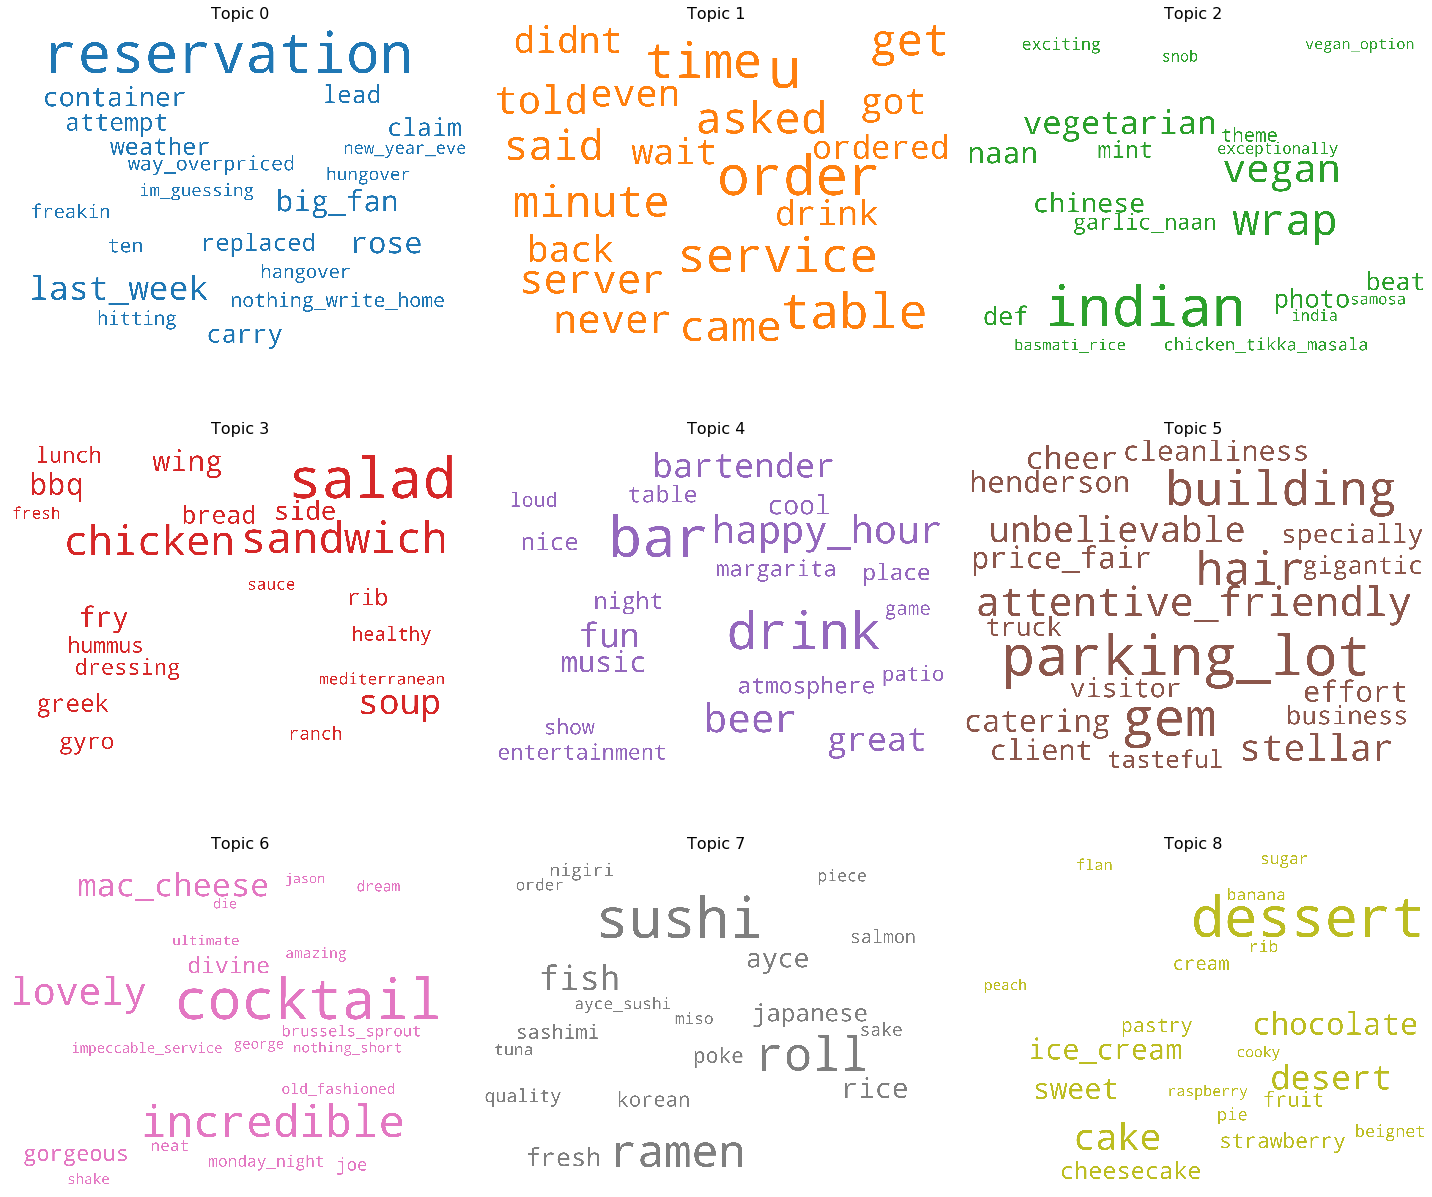

In [0]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,num_words=20)

fig, axes = plt.subplots(3,3, figsize=(20,18), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Plot using pyLDAviz**

In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.259480 -0.058640       1        1  15.805266
13     0.299389 -0.009083       2        1  14.660971
12     0.296781  0.004296       3        1  14.059697
11     0.262616 -0.132502       4        1  12.701943
10     0.163384  0.083949       5        1   8.389089
8      0.233557 -0.083049       6        1   7.649693
1      0.129240  0.228034       7        1   7.146971
0      0.121508 -0.094787       8        1   3.987156
17     0.072495 -0.130981       9        1   3.373840
7     -0.049652  0.193861      10        1   2.662976
18    -0.084904  0.084134      11        1   2.147651
2     -0.052985  0.161712      12        1   1.971898
15    -0.116467  0.172182      13        1   1.621383
6     -0.192578  0.006989      14        1   1.040173
19    -0.219180 -0.057690      15        1   0.684343
9     -0.218677 -0.071660      16        1   0.470541
4     -0.215850 -0.071578      17        1   0.444018
14    -0.228598 -0.075576      18        1   0.400261
5     -0.228432 -0.075653      19        1   0.397658
3     -0.231127 -0.073959      20        1   0.384478, topic_info=      Category           Freq             Term          Total  loglift  logprob
2201   Default   62487.000000            pizza   62487.000000  30.0000  30.0000
177    Default  151045.000000                u  151045.000000  29.0000  29.0000
33     Default  387873.000000            place  387873.000000  28.0000  28.0000
57     Default  266869.000000            great  266869.000000  27.0000  27.0000
701    Default  101735.000000            drink  101735.000000  26.0000  26.0000
...        ...            ...              ...            ...      ...      ...
10767  Topic20     246.008759         instance     266.731964   5.4802  -6.0987
7544   Topic20     253.375214           heater     277.606171   5.4697  -6.0692
2820   Topic20     538.039001         hangover     767.932129   5.2053  -5.3161
7549   Topic20     300.520660  prompt_friendly     388.784149   5.3035  -5.8985
92686  Topic20     347.496368   ostrich_burger     764.515320   4.7726  -5.7533

[1196 rows x 6 columns], token_table=       Topic      Freq                   Term
term                                         
14012      1  0.004309  absolutely_incredible
14012      2  0.004309  absolutely_incredible
14012      3  0.004309  absolutely_incredible
14012      4  0.004309  absolutely_incredible
14012      5  0.004309  absolutely_incredible
...      ...       ...                    ...
3512      16  0.000441                  youve
3512      17  0.000441                  youve
3512      18  0.000441                  youve
3512      19  0.000441                  youve
3512      20  0.000441                  youve

[19828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 14, 13, 12, 11, 9, 2, 1, 18, 8, 19, 3, 16, 7, 20, 10, 5, 15, 6, 4])